<a href="https://colab.research.google.com/github/guifzy/matematica/blob/main/linear_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TENSORS: nome dado a variaveis de diferentes dimensões**

---


x = scaler;
[x, y] = vector;
[[x, y], [z, w]] = matrix;
3D matrix = 3-tensor;
3D+ matrix = n-tensor;

#Importando as Bibliotecas

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# 1- Conceitos Básicos de Algebra linear

## $L^2$ Norm(Módulo de um vetor) -> Distância de um vetor x

In [ ]:
x = np.array([25, 2, 5])
x

array([25,  2,  5])

In [ ]:
#forma tradicional
(25**2 + 2**2 + 5**2)**(1/2)

25.573423705088842

In [ ]:
#usando numpy
np.linalg.norm(x)

25.573423705088842

In [ ]:
#usnado torch
torch.norm(torch.tensor([25, 2, 5.]))

tensor(25.5734)

##**Matrizes e Matriz transposta**

In [ ]:
X = np.array([[25, 2], [5, 26], [3, 7]])
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [ ]:
X.shape

(3, 2)

In [ ]:
X_p = torch.tensor([[25, 2], [5, 26], [3, 7]])
X_p

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [ ]:
X_p.shape

torch.Size([3, 2])

In [ ]:
X.T

array([[25,  5,  3],
       [ 2, 26,  7]])

In [ ]:
X_p.T
#Mesmo comando para as duas bibliotecas

tensor([[25,  5,  3],
        [ 2, 26,  7]])

##**Dot Product(Pruduto Escalar)**

Multiplicação entre dois vetores, associação de dois vetores a um número real

In [ ]:
b = np.array([1, 2, 3])
b

array([1, 2, 3])

In [ ]:
x

array([25,  2,  5])

In [ ]:
np.dot(b, x)

44

##**Multiplicação de Matrizes**

Tipos de multiplicação:

*   Multiplicação por escalares(multiplica cada elemento da matriz por um escalar)
*   Multiplicação entre escalares de uma matriz $A \odot B$(Handamard product)
*   Multiplicação entre matrizes $A \dot B$






In [ ]:
#Multiplicação por escalares
X*3

array([[75,  6],
       [15, 78],
       [ 9, 21]])

In [ ]:
X*3+3

array([[78,  9],
       [18, 81],
       [12, 24]])

Hadamard product

In [ ]:
A = np.array([[3, 4], [5, 6], [7, 8]])
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [ ]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [ ]:
X * A #Multiplica cada escalar individualmente

array([[ 75,   8],
       [ 25, 156],
       [ 21,  56]])

Multiplicação de matrizes

*   Número de colunas da primeira deve ser igual ao número de linhas da outra matriz, 3,3 & 3,2 por exemplo ;
*   $A \dot B$ != $B \dot A$ ;



In [ ]:
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [ ]:
B = np.array([[1, 9], [2, 0]])
B

array([[1, 9],
       [2, 0]])

In [ ]:
A.shape

(2, 2)

In [ ]:
B.shape

(2, 2)

In [ ]:
np.dot(A, B) #coluna da primeira igual linha da segunda

array([[11, 27],
       [17, 45],
       [23, 63]])

In [ ]:
A_p = torch.tensor([[3, 4], [5, 6], [7, 8]])
A_p

tensor([[3, 4],
        [5, 6],
        [7, 8]])

In [ ]:
B_p = torch.tensor([[1, 9], [2, 0]])
B_p

tensor([[1, 9],
        [2, 0]])

In [ ]:
torch.matmul(A_p, B_p) #Usando o pyTorch

tensor([[11, 27],
        [17, 45],
        [23, 63]])

**Matriz Identidade**

## Matrix Inversa

In [ ]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [ ]:
Xinv = np.linalg.inv(X)
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])



---



---



# 2- Eigen Formula

> ### Realizando o plot de um vetor

Para realização dos plots, ierei fazer uma função que recebe como argumento um vetor e a cor desse vetor

In [ ]:
def plot_vectors(vectors, colors):
  plt.figure() # realiza o plot de uma figura em branco
  plt.axvline(x=0, color='lightgray') #determina que a linha passa pelo eixo X na posição 0
  plt.axhline(y=0, color='lightgray') #determina que a linha passa pelo eixo y na posição 0


  for i in range(len(vectors)): # percorre o tamanho do meu vetor
    x = np.concatenate([[0,0],vectors[i]]) # junta os valores do vator [0, 0] co o vetor desejado, ex:
    # [0, 0, 1, 2, 3]
    plt.quiver([x[0]], [x[1]], [x[2]], [x[3]], angles='xy', scale_units='xy', scale=1, color=colors[i],) # função para imprimir uma
    #seta no gráfico que começa no eixo [0, 0]-> primeiras duas posições do vetor, e aponta na direção do terceiro e quarto elemento

In [ ]:
v = np.array([3, 1])

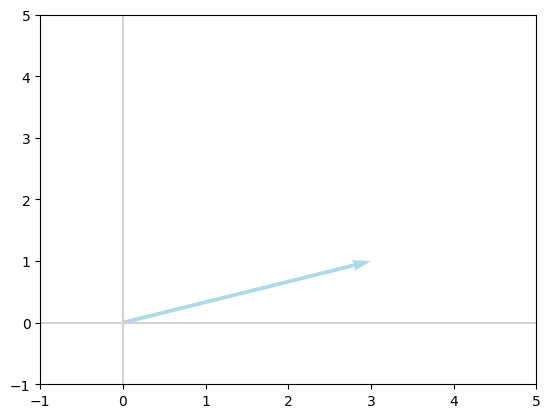

In [ ]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

> ## Affine Transformations( transformação afim )




É uma transformação geométrica que preserva linhas e paralelismo, mas não necessariamente distâncias euclidianas e ângulos.

**NOTA:**

---
*   "Aplicar" uma matriz a um vetor( multiplicação de matrizes ) pode mudar a forma do vetor( um vetor 3,2 pode se tornar um veotr 2,2 );



*   "Aplicar" uma matriz identidade a um vetor ou matriz não muda sua forma( qualquer vetor/matrzi vezes uma matriz identidade resulta nele mesmo);
---


**1-** Considere uma matriz $E$ capaz de inverter o eixo $x$ de um vetor

In [ ]:
E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [ ]:
Ev = np.dot(E, v)
Ev

array([ 3, -1])

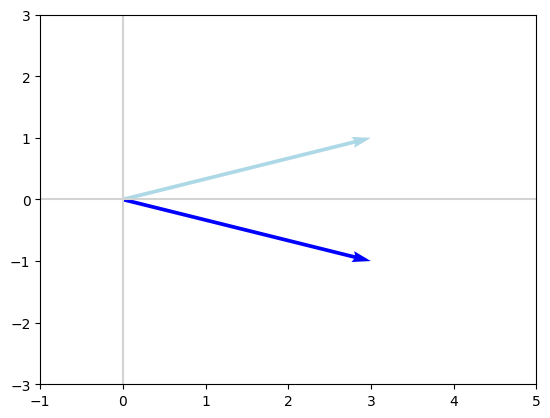

In [ ]:
plot_vectors([v, Ev], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

**2-** Considerando uma matriz $F$ que é capaz de inverter o eixo $y$

In [ ]:
F = np.array([[-1, 0], [0, 1]])
F

array([[-1,  0],
       [ 0,  1]])

In [ ]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

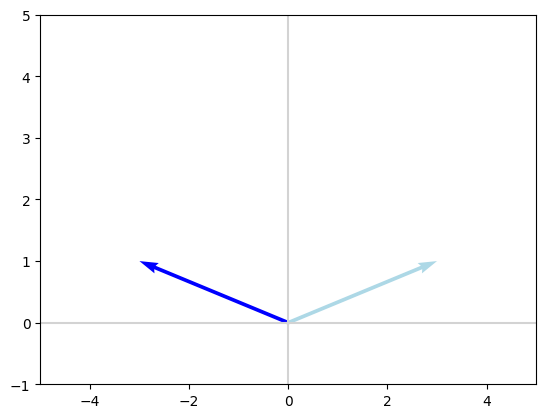

In [ ]:
plot_vectors([v, Fv], ['lightblue', 'blue'])
plt.xlim(-5, 5)
_ = plt.ylim(-1, 5)

Outros exemplos de transformações de vetores por matrizes:

In [ ]:
A = np.array([[-1, 4], [2, -2]]) # matriz para mudar o angulo do vetor
A

array([[-1,  4],
       [ 2, -2]])

In [ ]:
Av = np.dot(A, v)

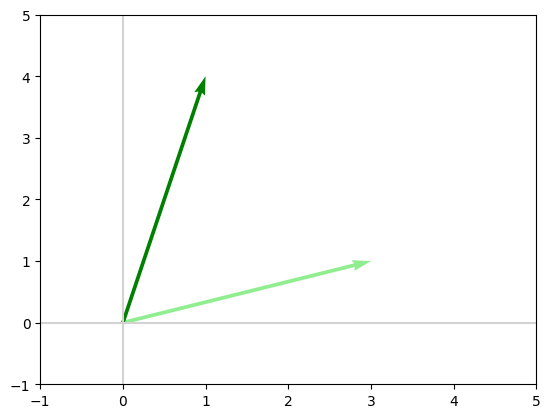

In [ ]:
plot_vectors([v, Av], ['lightgreen', 'green'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

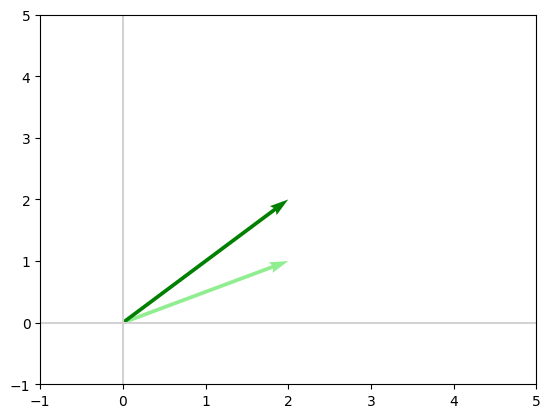

In [ ]:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)



> ## Eigenvectors and Eigenvalues





---



*   **Eigenvectors:** é um vetor especial associado a uma matriz onde, quando transformado por esse mesma matriz, sua direção permanece a mesma, apenas são escalados( mudam seus valores individuais );





*   **Eigenvalues:** de forma simplificada, é um escalar que escala  o vetor especial( Eigenvector ), representado por $\lambda$, atende a seguinte fórmula:



> $Av = \lambda v$



---
OBS: Quando um vetor especial muda sua direção devido a uma transformação por uma matriz $x$, pode-se dizer que ele não é um $Eigenvector$ dessa mestriz.



In [ ]:
A

array([[-1,  4],
       [ 2, -2]])

Para realizar as operações, irei usar a função *eig()*, que retorna dois parâmetros de uma matriz:

*   Um vetor de eigenvalues;
*   Uma matriz de eingenvectors;



In [ ]:
lambdas, V = np.linalg.eig(A)

In [ ]:
V # cada coluna de uma matriz é um eigenvector

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

In [ ]:
lambdas

array([ 1.37228132, -4.37228132])

Aplicando a fórmula:

$Av = \lambda v$

In [ ]:
# Armazenei o primerio vetor e o primeiro escalar e duas variaveis
lamb = lambdas[0]
v = V[:,0]

In [ ]:
Av = np.dot(A, v)
Av

array([1.18031462, 0.70000958])

In [ ]:
v * lamb

array([1.18031462, 0.70000958])

Vamos realizar um plot para visualizar a transformação do $Eigenvector$ atravez da aplicação de sua matriz:

Repare que a direção do vetor permanece a mesma, porém, com valor escalar diferente.

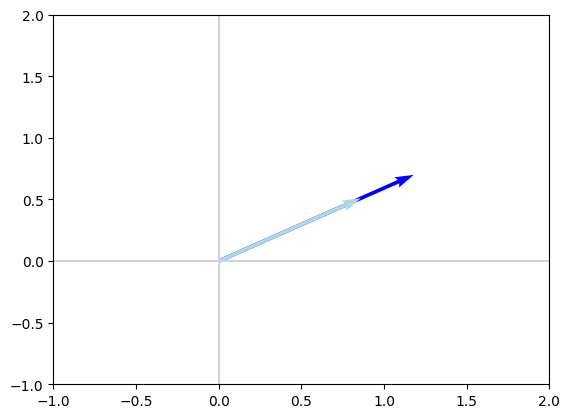

In [ ]:
plot_vectors([Av, v], ['blue', 'lightblue'])
plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)

Transformação do segundo vetor:

In [ ]:
v2 = V[:,1]
lamb2 = lambdas[1]

In [ ]:
Av2 = np.dot(A, v2)
Av2

array([ 3.34281692, -2.81822977])

In [ ]:
lamb2 * v2 # Provando a formula

array([ 3.34281692, -2.81822977])

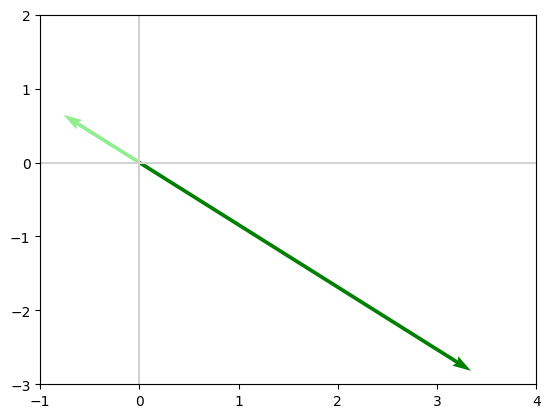

In [ ]:
plot_vectors([Av2, v2], ['green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

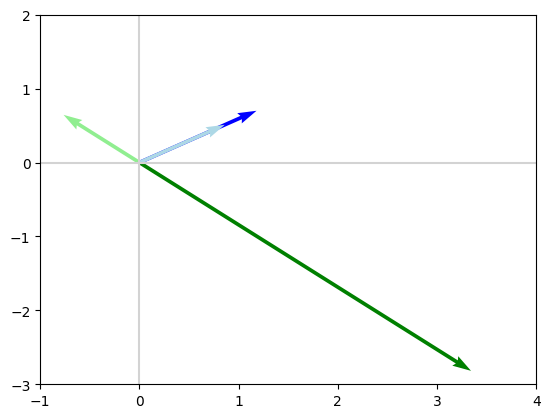

In [ ]:
plot_vectors([Av2, v2, Av, v], ['green', 'lightgreen', 'blue', 'lightblue'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

### Eigenvectors and Eigenvalues em mais de duas dimensões > 2D

In [ ]:
X = np.array([[25, 2, 9], [5, 26, -5], [3, 7, -1]])
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [ ]:
lambdas_x, V_x = np.linalg.eig(X)

In [ ]:
V_x

array([[-0.71175736, -0.6501921 , -0.34220476],
       [-0.66652125,  0.74464056,  0.23789717],
       [-0.22170001,  0.15086635,  0.90901091]])

In [ ]:
lambdas_x

array([29.67623202, 20.62117365, -0.29740567])

In [ ]:
lamb_x = lambdas_x[0]
v_x = V_x[:,0]

In [ ]:
np.dot(X, v_x)

array([-21.12227645, -19.77983919,  -6.5792208 ])

In [ ]:
lamb_x * v_x

array([-21.12227645, -19.77983919,  -6.5792208 ])

#3- Determinantes


*   De forma resumida, o determiante é o resumo do valor de uma matriz em um escalar, esse escalar é usado para determinar se uma matriz possui ou não uma inversa;

*   Se, det[$X$] = 0 :
  *   Matrix $X$ é singular, ou seja, suas colunas são linearmente dependentes;

  *   Esta matriz não possui inversa;








 ## Determinantes de Matrizes 2x2

In [ ]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [ ]:
np.linalg.det(X)

-2.0000000000000013

In [ ]:
# Exemplo de matriz singular
N = np.array([[-4, 1], [-8, 2]])
N

array([[-4,  1],
       [-8,  2]])

In [ ]:
np.linalg.det(N)

0.0

In [ ]:
# Retire o comentartio para observar o erro
# N_inversa = np.linalg.inv(N)

## Determinantes & Eigenvalues

det[$X$] é o mesmo que o produto dos escalares( $Eigenvalues$ ) de uma matriz.

In [ ]:
X = np.array([[1, 2, 4], [2, -1, 3], [0, 5, 1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [ ]:
np.linalg.det(X) #Valor do determinante

19.999999999999996

In [ ]:
lambdas, v = np.linalg.eig(X)

In [ ]:
np.product(lambdas) #Produto dos escalares

19.99999999999999

###**Valor Absoluto**

O valor absoluto de uma matriz é o seu módulo, ou distância em relação a amtriz identidade, |$X$|.

--Este valor é sempre positivo e é usado para determinar a distância em relação a matriz identidade

--Em outros casos, pode sinalizar o aumento do volume de uma matriz quando aplicada a outra, |det[$X$]|


In [ ]:
np.abs(X) # Matriz representando a distancia em relação a matriz identidade

array([[1, 2, 4],
       [2, 1, 3],
       [0, 5, 1]])

In [ ]:
np.abs(np.linalg.det(X)) # Valor de aumento do volume caso aplicada a outra matriz

19.999999999999996



---



---



In [ ]:
# Função para transformar matriz em um vetor
# A função recebe como parametros a matrix e a coluna a ser transformada em vetor
def vectorfy(matriz, coluna):
  return np.array(matriz[:, coluna]).reshape(-1)



---



---



##Visualizações

Agora vou realizar alguns plots para visualização dos conceitos explicados anteriormente:

In [ ]:
#Exemplo de matriz singular
N

array([[-4,  1],
       [-8,  2]])

In [ ]:
np.linalg.det(N) #Determinante igual a 0, não tem inversa ou seja, é uma matriz singular

0.0

In [ ]:
#Provando que eles são impossíveis atravez de seus vetores especiais
lambdas, V = np.linalg.eig(N)
v = vectorfy(V, 0)
Nv = np.dot(N, v)

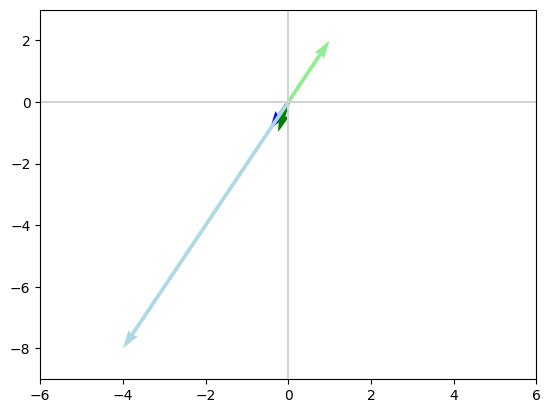

In [ ]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(N, 0), vectorfy(N, 1)],
            ['blue', 'green', 'lightblue', 'lightgreen'])
plt.xlim(-6, 6)
_ = plt.ylim(-9, 3)

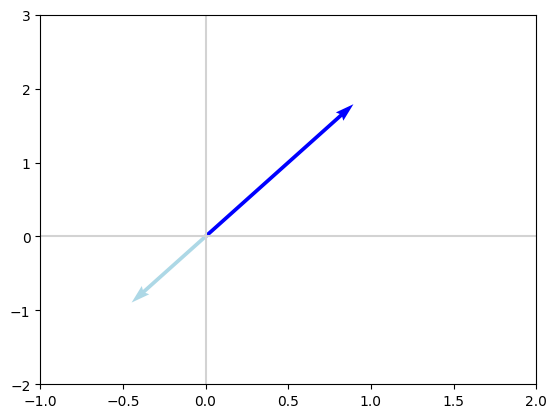

In [ ]:
plot_vectors([v, Nv],
            ['lightblue', 'blue'])
plt.xlim(-1, 2)
_ = plt.ylim(-2, 3)

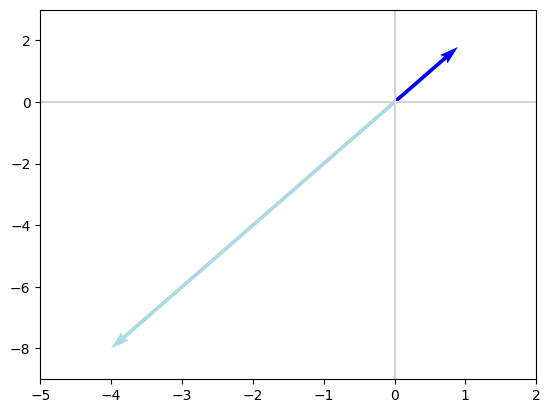

In [ ]:
plot_vectors([N[:, 0], Nv],
            ['lightblue', 'blue'])
plt.xlim(-5, 2)
_ = plt.ylim(-9, 3)

# Perceba que em todos os casos os Eigenvectors da matriz N permanecem na mesma direção
# porém, com valores esclares diferentes

Agora vamos visualizar um exemplo não singular:

In [ ]:
D = np.array([[2, 0], [0, 2]])
D

array([[2, 0],
       [0, 2]])

In [ ]:
np.linalg.det(D) # Possui inversa, não é singular

4.0

In [ ]:
I = np.array([[1, 0], [0,1]])

In [ ]:
DI = np.dot(D, I)
DI

array([[2, 0],
       [0, 2]])

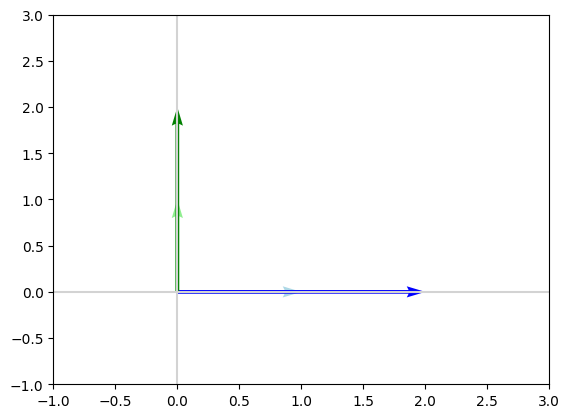

In [ ]:
plot_vectors([vectorfy(I, 0), vectorfy(I, 1), vectorfy(DI, 0), vectorfy(DI, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [ ]:
lambdas, V = np.linalg.eig(D)
lambdas #Observe que os valores dos escalares geram o novo vetor

array([2., 2.])

In [ ]:
V

array([[1., 0.],
       [0., 1.]])

In [ ]:
VD = np.dot(D, V) # Valor da matriz original
VD

array([[2., 0.],
       [0., 2.]])

Em síntese, percebe-se como os conceitos de Eigenvectors/Eigenvalues, multiplicação de matrizes e determinantes se compltam de forma em que podemos visualizar as tranformações de nossas matrizes.

# 4- Eigendecomposition

- Consiste ná técninca de fatoração de uma matriz, onde seus componentes são representados pela junção dos Eigenvector como matriz e Eigenvalues em uma matriz diagonal.

- Ela se dá pela seguinte fórmula:

> $A = V \Lambda V^{-1}$
  *   $V$ corresponde a concatenação dos vetores especiais;
  *   $\Lambda$ corresponde a letra grega $λ$ maiúsculo, representando uma matriz diagonal com os Eigenvalues;



In [ ]:
A = np.array([[4, 2], [-5, -3]])
A

array([[ 4,  2],
       [-5, -3]])

In [ ]:
lambdas, V = np.linalg.eig(A)
V

array([[ 0.70710678, -0.37139068],
       [-0.70710678,  0.92847669]])

In [ ]:
Vinv = np.linalg.inv(V)
Vinv

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

In [ ]:
Lambda = np.diag(lambdas)
Lambda

array([[ 2.,  0.],
       [ 0., -1.]])

In [ ]:
np.dot(V, np.dot(Lambda, Vinv)) # Provando que a fatoração desta matriz é possível
                                # atravéz da formula

array([[ 4.,  2.],
       [-5., -3.]])

**OBS:** Esta fatoração só é possíveis em matrizes linearmente independentes, com produto escalar diferente de zero!
Ela também não é possível em matrizes com números complexos.

##Situação simétrica

Em situações onde há matrizes simétricas, $A=A^T$, a fatoração é ainda mais simples e computacionalmente favoravel.

Ela atende a seguinte fórmula:
> $A = Q \Lambda Q^T$
- $Q$ é equivalente a $V$,

In [ ]:
A = np.array([[2, 1], [1, 2]])
A

array([[2, 1],
       [1, 2]])

In [ ]:
lambdas, Q = np.linalg.eig(A)
Q

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [ ]:
Lambda = np.diag(lambdas)
Lambda

array([[3., 0.],
       [0., 1.]])

In [ ]:
np.dot(Q, np.dot(Lambda, Q.T)) #Provano a fatoração

array([[2., 1.],
       [1., 2.]])

#5- Exemplos Reais

##Singular Value Decomposition (SVD)

>$A=UDV^T$

Onde:

* $U$ é uma matriz ortogonal $i \times i$; suas colunas são **vetrores sigulares da esquerda** de $A$.
* $V$ é uma matriz ortogonal $j \times j$; suas colunas são os **valores singulares da direita** de $A$.
* $D$ é uma matriz diagonal $i \times j$; os elementos da diagonal principal são **valores singulares** de $A$.




In [ ]:
A = np.array([[-1, 2], [3, -2], [5, 7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [ ]:
U, d, VT = np.linalg.svd(A)

In [ ]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [ ]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [ ]:
d

array([8.66918448, 4.10429538])

In [ ]:
np.diag(d)

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

Para realizar a multiplicação entre $D$ e $V^T$ as matrizes precisam seguir a lei de multiplicação de matrizes.

In [ ]:
D = np.concatenate((np.diag(d), [[0, 0]]), axis=0)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538],
       [0.        , 0.        ]])

In [ ]:
np.dot(U, np.dot(D, VT))

array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]])

Como provar os valores singulares:

*  $U$: Valores singulares da esquerda = Eigenvectors de $AA^T$
*  $V$: Valores singulares da direita = Eigenvectors de $A^TA$
*  $d$: Valores singulares diferentes de zero = raiz quadrada dos eigenvalues de $AA^T$ ou $A^TA$






In [ ]:
lambdas, V = np.linalg.eig(np.dot(A, A.T))

In [ ]:
V

array([[-0.12708324,  0.87125411, -0.47409506],
       [-0.00164602,  0.47778451,  0.87847553],
       [-0.99189069, -0.11241989,  0.0592843 ]])

In [ ]:
lambdas2, V2 = np.linalg.eig(np.dot(A.T, A))

In [ ]:
V2.T

array([[-0.82984845,  0.55798885],
       [-0.55798885, -0.82984845]])

In [ ]:
np.sqrt(lambdas2)

array([4.10429538, 8.66918448])

## Moore-Penrose Pseudoinverse

É uma generalização da matriz inversa para casos em que a matriz não é invertível

Amplamente usada para resolver variaveis em matrizes não quadraticas( incapazes de ralizar inversa ).

>$A^+ = VD^+U^T$

Onde:

*   $D^+ =$ É a inversa dos valores diferentes de zerto transpostos




In [ ]:
A = np.array([[-1, 2], [3, -2],[5, 7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [ ]:
U, d, VT = np.linalg.svd(A)

In [ ]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [ ]:
d

array([8.66918448, 4.10429538])

In [ ]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

Transformando $d$ em $D^+$

In [ ]:
D = np.diag(d) #Primeiro, transformamos os valores singulares em uma matriz diagonal
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [ ]:
Dinv = np.linalg.inv(D) #Em seguida realizamos sua inversa
Dinv

array([[0.1153511 , 0.        ],
       [0.        , 0.24364718]])

Para realizar a formula, $D^+$ deve atendar a regra de multiplicação em relação a matriz $U^T$.

In [ ]:
Dplus = np.concatenate((Dinv, np.array([[0, 0]]).T), axis=1)
Dplus

array([[0.1153511 , 0.        , 0.        ],
       [0.        , 0.24364718, 0.        ]])

In [ ]:
np.dot(VT.T,np.dot(Dplus, U.T)) # Matriz pseudoinversa de A

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

###Nota
>Apesar disso tudo o numpy já contem uma função capaz de descobrir a pseudoinversa de uma matriz

In [ ]:
np.linalg.pinv(A)

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

## Regressão com pseudoinversa

Aqui faremos a aplicação da pseudoinversa para resolver variaveis de uma matriz não quadratica, muitas linhas e poucas colunas.

>Regressão procura realizar predições com base em dados, normalmente DataFrames, que são divididos em valores tematicos e uma coluna resultande destes valores.

A regressão se da pela formula:

>$y=Xw$

*   y = Casos a serem previstos;
*   X = Valores usados para realizar a predição;
*   w = Vetor de pesos, variaveis, a serem aplicadas sobre a matriz $X$;

**Exemplo:**  Prever valores de casas, neste caso $y$ será a previsão do valor, $X$ será uma matriz de valores como número de quartos, número de banheiros, tamanho da casa e etc, e $w$ será um vetor de pesos sob os valores de $X$.





Para descobrir o valor de $w$, podemos usar a seguinte afirmação:

$Xw=y$ ---> $X^+Xw=X^+y$

$$$$
Ou seja
 $$$$

$Iw=X^+y$

>$w=X^+y$

In [1]:
x1 = [0, 1, 2, 3, 4, 5, 6, 7.] # Dosagem de medicamento para tratamento de Alzheimer
y = [1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37] # taxa de esquecimento em relação ao uso do medicamento

In [3]:
title = 'Tratamento'
xlabel = 'Dose medicamento (mL)'
ylabel = 'Taxa Esquecimento'

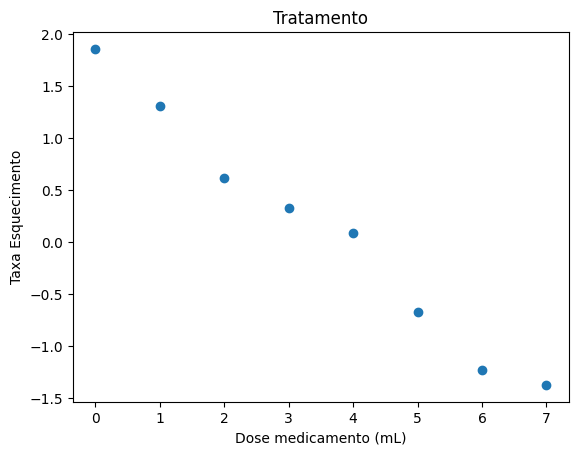

In [4]:
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
_ = ax.scatter(x1, y)

Para realizarmos e regressão, precisamos de ter mais de uma coluna na matriz de predição. Como os valores da intersepção de $y$ são constantes(0, 1, 4, 10, ..., $n$), podemos adicionar uma coluna de números 1, assim, a inclinação da linha irá se manter.

In [5]:
x0 = np.ones(8) # 8 é o tamanho de variaveis do nosso esquema
x0

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
X = np.concatenate((np.matrix(x0).T, np.matrix(x1).T), axis=1) # Preparando a matriz de aprendizagem
X

matrix([[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.],
        [1., 6.],
        [1., 7.]])

Agora é possível aplicar a formula $w=X^+y$.

In [8]:
w = np.dot(np.linalg.pinv(X), y)
w

matrix([[ 1.76      , -0.46928571]])

O vetor $w$, contém os pesos da nossa regreção denotados de:

- $b$(Termo de Intercepção)
- $m$(Coenficiene Angular).

>Termo de Intercepção: É o valor de y quando x é igual a zero, representa o ponto onde a linha de regressão cruza o eixo y. Ou seja, determina o começo da linha de regressão.

>**Por exemplo:** Em um modelo de regressão linear para prever preços de casas, o termo de intercepção pode representar o preço base de uma casa (quando outras características são zero).

In [10]:
b = np.asarray(w).reshape(-1)[0]
b

1.7599999999999985

>Coeficiente angular: Representa o quanto a variável $y$ muda quando a variável $x$ aumenta em uma unidade. Caso seja positivo, quando $x$ aumenta $y$ também aumenta, e caso negativo, quando $x$  o $y$ diminui.

In [9]:
m = np.asarray(w).reshape(-1)[1]
m

-0.4692857142857139

Para realizarmos o plot dessa linha de regressão precisamos da seguinte formula:

>$y = mx + b$

>$y = -0.479x + 1.76$

Com isso, podemos determinar os pontos de $y$ da linha de regressão a partir no menor e do maior valor de $x$.


**OBS:** Usamos o menor e maior ponto de $x$ pois sabemos que o menor ponto de $x$ determina o começo da linha de regressão. O mesmo pensamento vale para o maior ponto.

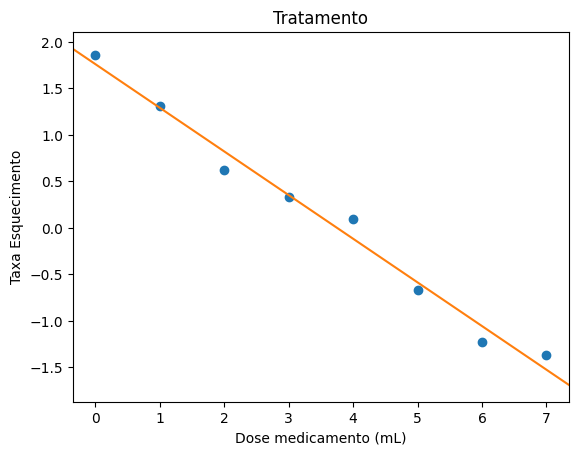

In [11]:
fig, ax = plt.subplots()

plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

ax.scatter(x1, y)

x_min, x_max = ax.get_xlim() # Menor e maior valor de x

# Aplicando a formula para descobrir os pontos de y para o começo e fim da linha de regressão
y_at_xmin = m*x_min + b
y_at_xmax = m*x_max + b

ax.set_xlim([x_min, x_max])
_ = ax.plot([x_min, x_max], [y_at_xmin, y_at_xmax], c='C01')

A partir desta formula, sempre será possível determinar o a eficacia de uma dosagem do medicamento, pos a partir do valor da dose, $x$, é possível determinar $y$( $y=mx + b$ ).